# Ignatian Pilgrims

![P1580313.jpg](img/P1580313.jpg)
$^{1}$Image credit: https://caminoignaciano.org/

Nov, 2022

## Background
The [Ignatian Way](https://caminoignaciano.org/en/) is a pilgrimage path that follows the route Ignatius of Loyola traveled in 1522 from Loyola to the city of Manresa. Starting in the Basque Country, it passes through Rioja, Navarre, Aragon and Catalonia, ending in Manresa —close to Barcelona, where Ignatius was due to embark for the Holy Land.

![map-ignatian-way_small.jpg](img/map-ignatian-way_small.png)

The journey starts in Loyola, the hometown of Saint Ignatius, and consists of some 660 km divided in 27 stages. In their first day, pilgrims arrive to the town I live in, and mostly in the summer I occasionally spot some of them walk through with their bulky backpacks. Often they seem to be foreigners and I usually wonder about the country they come from.

I decided to ask in the [Tourist Information Office](https://urolaturismoa.eus/es/) in Loyola, where they kindly provided me with the data after suggesting I could make for them this little study.

## The data
I was given the records with the number of pilgrims and their origins from 2016 to 2022.

```{note}
These records refer only to pilgrims that came into the tourist office. The sanctuary is the official starting point of this religious journey and not all pilgrims pop in the tourist office.
```

In [88]:
# Import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
ignatian = pd.read_csv("data/ignatian.csv", parse_dates=["date"], index_col="date")
print(ignatian)

            pax         from   region  type        notes
date                                                    
2016-12-31   63    Australia      NaN   NaN      Taldean
2016-12-31   54          USA      NaN   NaN      Taldean
2016-12-31   23        Italy      NaN   NaN      Taldean
2016-12-31   15  Philippines      NaN   NaN      Taldean
2016-12-31  144        Spain  Euskadi   NaN      Bakarka
...         ...          ...      ...   ...          ...
2022-09-01    2          USA      NaN  foot  25 ean hasi
2022-09-01    1       France      NaN  foot   27 an hasi
2022-10-31    0          NaN      NaN   NaN          NaN
2022-11-30    0          NaN      NaN   NaN          NaN
2022-12-31    0          NaN      NaN   NaN          NaN

[311 rows x 5 columns]


## Data Validation
In `type` column, some records contain the value `info`, meaning the record was not about actual pilgrims but instead related to people asking for information about the Ignatian Way.

In [89]:
# Print "info" type entries
print(ignatian[ignatian["type"] == "info"])

            pax    from      region  type  \
date                                        
2019-07-26    2   Spain    Cataluña  info   
2019-08-03    3   Italy         NaN  info   
2019-08-16    3   Spain    Oiartzun  info   
2019-08-19    1   Spain    Donostia  info   
2019-08-23    1   Spain      Madrid  info   
2019-08-26    3  Libano         NaN  info   
2019-08-31    2   Spain  Errenteria  info   
2019-08-31    1   Japan         NaN  info   
2019-09-01    2   Spain    Azpeitia  info   
2019-09-22    1   Spain    Azpeitia  info   
2022-01-01    4   Spain    Galdakao  info   
2022-05-01   10      UK         NaN  info   

                                                        notes  
date                                                           
2019-07-26  Manresatik etorri dira, Gipuzkoari buruz galde...  
2019-08-03  Inguruko info bila etorri dira eta foiletoa ik...  
2019-08-16             2020ko Martxoan hasiko dira ziurrenik.  
2019-08-19    Ea Inaziotarbidearen mapa osoa genu

I therefore leave out these `info` entries to proceed with the exploratory analysis.

In [90]:
# Get rid of "info" type records
ignatian = ignatian[ignatian["type"] != "info"]

## Exploratory Data Analysis

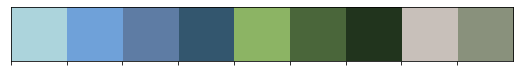

In [91]:
# Define project palette related to the main image above
palette_ign = ["#acd4dc", "#6fa1d9", "#5e7ca4", "#33566e",
               "#8cb464", "#4a663a", "#21341d",
               "#c8c0ba", "#89917c"]

# Plot palette
sns.palplot(sns.color_palette(palette_ign))

### Absolute numbers per year

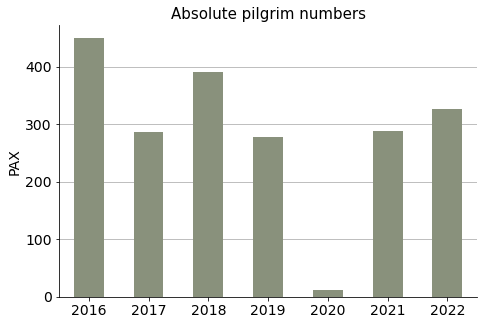

In [92]:
# Group by years and sum pax numbers
ignatian_yearly = ignatian.groupby(ignatian.index.year)["pax"].sum()

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

ignatian_yearly.plot(ax=ax, kind="bar", color=palette_ign[8])

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Absolute pilgrim numbers", size=15)
ax.set_xlabel("")
ax.set_ylabel("PAX", size=14)
sns.despine()

plt.show()

### Average pilgrims per month
In order to calculate average numbers per month, 2020-pandemic year was skipped to avoid distorting results. Neither were 2016, 2017 and 2018 considered, because data of these years came aggregated and was not month-related.

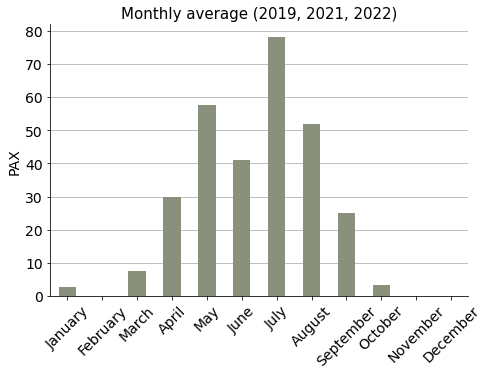

In [93]:
# Get values from 2019, 2021, 2022
ignatian_19_21_22 = pd.concat([ignatian.loc["2019"], ignatian.loc["2021"], ignatian.loc["2022"]])

# Group by months and sum pax numbers, divide by the number of years considered: 3
ignatian_monthly_avg = ignatian_19_21_22.groupby(ignatian_19_21_22.index.month)["pax"].sum().div(3)

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

ignatian_monthly_avg.plot(ax=ax, kind="bar", color=palette_ign[8])

ax.set_xticklabels(ignatian_19_21_22.index.month_name().unique(), rotation=45)
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title("Monthly average (2019, 2021, 2022)", size=15)
ax.set_xlabel("")
ax.set_ylabel("PAX", size=14)
sns.despine()

plt.show()

### International proportion

```{note}
For the rest of the study only records from 2019 onwards will be considered.
```

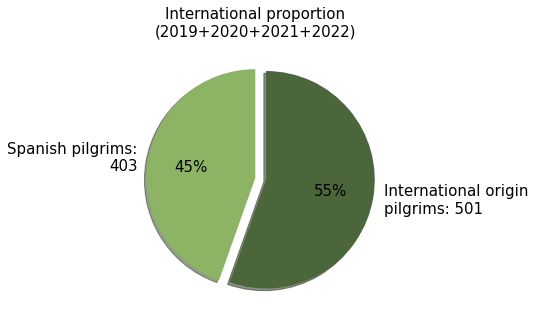

In [94]:
# Consider only from 2019 onwards
ignatian_19_20_21_22 = ignatian.loc["2019-01-31":]

# Calculate spanish pilgrims
spanish = ignatian_19_20_21_22[ignatian_19_20_21_22["from"] == "Spain"]["pax"].sum()

# Calculate foreign pilgrims
foreign = ignatian_19_20_21_22[ignatian_19_20_21_22["from"] != "Spain"]["pax"].sum()

# Plot
labels = f"Spanish pilgrims:\n{spanish}", f"International origin\npilgrims: {foreign}"
sizes = [spanish, foreign]
explode = (0, 0.1)

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%1.0f%%',
       normalize=True,
       shadow=True,
       startangle=90,
       colors=[palette_ign[4], palette_ign[5]],
       textprops={"size": 15},
      )

ax.set_title("International proportion\n(2019+2020+2021+2022)", size=15)

plt.show()

### Group types
This is one piece of information that can be extracted from the data: How do pilgrims travel? Alone? With a partner? In small groups? Large ones?

Just by choice, I have considered small groups to be from 3 up to 6 people —6 included.

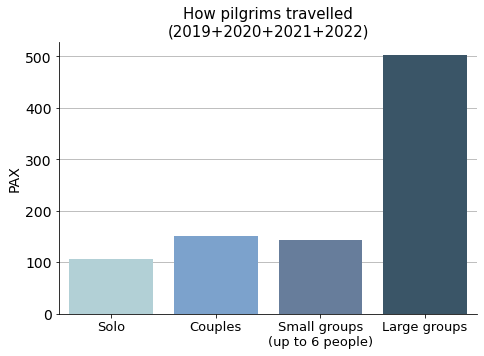

In [95]:
# Define the bins of the group types to be considered
small_threshold = 6 # <- just a choice
group_labels = ["solo", "couple", "small", "large"]
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, small_threshold), (small_threshold, 1000)])

# Create a new column with the group type assigned to the bin according to pax
ignatian_19_20_21_22["group"] = pd.cut(ignatian_19_20_21_22["pax"], bins).replace(bins, group_labels)

# Group by "group" and sum pax numbers
groups = ignatian_19_20_21_22.groupby("group")["pax"].sum().to_frame()

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

sns.barplot(x=groups.index, y="pax", data=groups, ax=ax,
            palette=palette_ign)

ax.set_xticklabels(["Solo", "Couples", "Small groups\n(up to 6 people)", "Large groups"])
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.set_title("How pilgrims travelled\n(2019+2020+2021+2022)", size=15)
ax.set_xlabel("")
ax.set_ylabel("PAX", size=14)
sns.despine()

plt.show()

It appears that the Ignatian Way has a majority of pilgrims coming in large groups.

### International numbers by group type

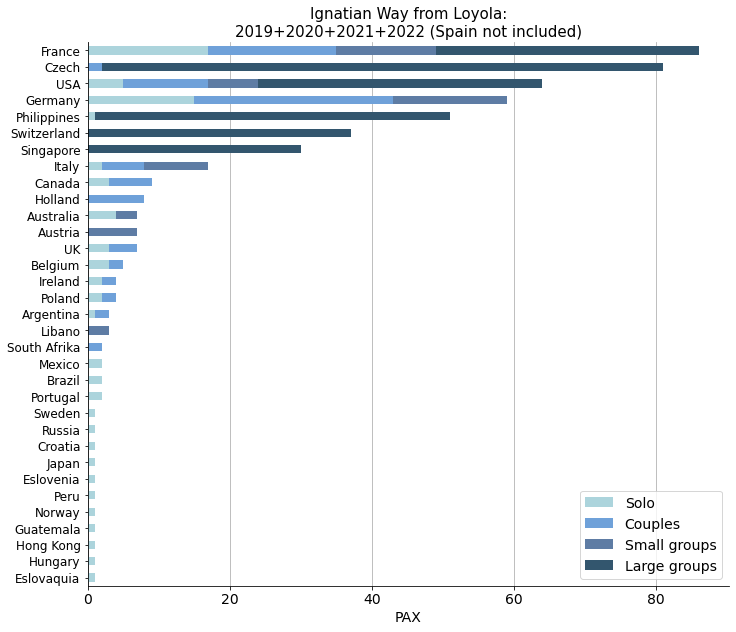

In [107]:
# Exclude Spain and group by origin and group-type, summing pax numbers
abroad_groups = ignatian_19_20_21_22[ignatian_19_20_21_22["from"] != "Spain"]\
                .groupby(["from", "group"])["pax"].sum().to_frame()

# Unstack inner level of index, then sum column values to a new column "total"
abroad_groups_wide = abroad_groups.unstack()
abroad_groups_wide[("pax", "total")] = abroad_groups_wide.sum(axis=1)

# Sort values by the "total" column
abroad_groups_wide_sorted = abroad_groups_wide.sort_values(("pax", "total"))
    
# Plot
fig, ax = plt.subplots(figsize=(11.5, 10))

abroad_groups_wide_sorted.drop(("pax", "total"), axis=1)\
        .plot(kind="barh", stacked=True, ax=ax, color=palette_ign)

ax.grid(axis="x")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=12)
ax.set_title("Ignatian Way from Loyola:\n2019+2020+2021+2022 (Spain not included)", size=15)
ax.set_xlabel("PAX", size=14)
ax.set_ylabel("", size=14)
ax.legend(["Solo", "Couples", "Small groups", "Large groups"], fontsize=14, loc='lower right')

sns.despine()
plt.show()

Not surpisingly, neighbouring French pilgrims come first in the list. What was more surprising was the relative amount of people from the Czech Republic, the Philippines or Singapore. We learn from this stacked bar chart that these nationals came mainly in large groups, maybe organized by Jesuit communities.

I select some significant countries and put them on a point plot for a more clear comparison.

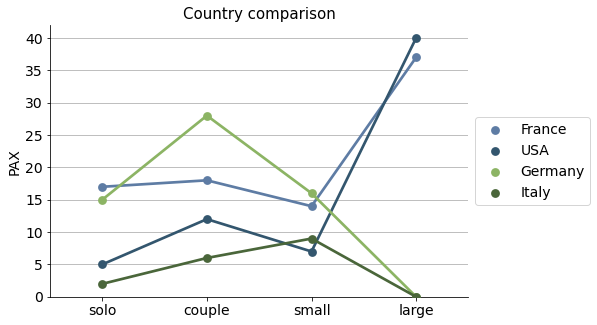

In [97]:
# Selection of the countries to compare
countries_selected = ["France", "USA", "Germany", "Italy"]

# Sort in descending order for the sake of the plot
abroad_groups_wide_sorted_desc = abroad_groups_wide.sort_values(("pax", "total"), ascending=False)\
                                .drop(("pax", "total"), axis=1)

# Stack, reset index and filter the countries considered
abroad_groups_ = abroad_groups_wide_sorted_desc.stack().reset_index()
abroad_groups_sel = abroad_groups_[abroad_groups_["from"].isin(countries_selected)]

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

sns.pointplot(x="group", y="pax", data=abroad_groups_sel, ax=ax,
              hue="from", palette=palette_ign[2:6])

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Country comparison", size=15)
ax.set_xlabel("")
ax.set_ylabel("PAX", size=14)
ax.set_ylim(0)
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', fontsize=14)
sns.despine()

plt.show()

### Spanish numbers by group type
Spanish pilgrims have some more specific informartion about their origins in the field called `region`.

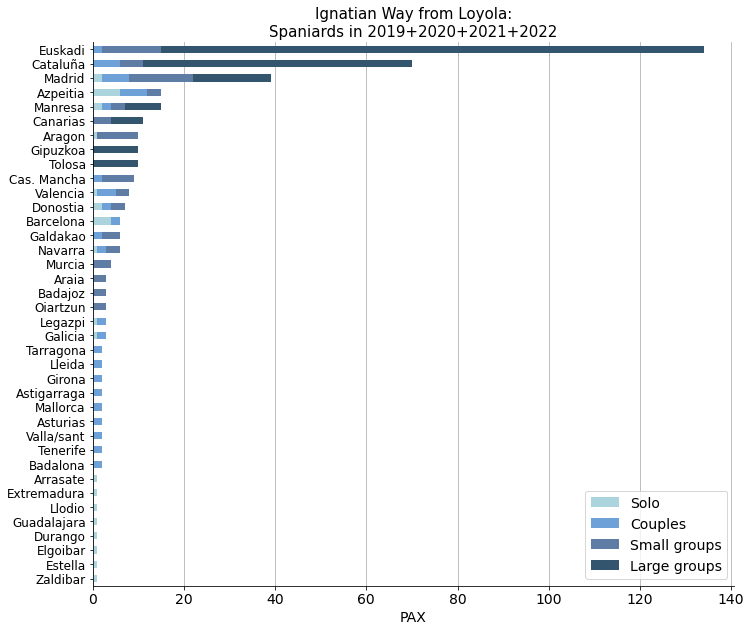

In [108]:
# Take Spain and group by its regions and group-type, adding pax numbers
spain_groups = ignatian_19_20_21_22[ignatian_19_20_21_22["from"] == "Spain"]\
                .groupby(["region", "group"])["pax"].sum().to_frame()

# Unstack inner level of index, then sum column values to a new column "total"
spain_groups_wide = spain_groups.unstack()
spain_groups_wide[("pax", "total")] = spain_groups_wide.sum(axis=1)

# Sort values by the "total" column, then drop this column
spain_groups_wide_sorted = spain_groups_wide.sort_values(("pax", "total"))

# Plot
fig, ax = plt.subplots(figsize=(11.5, 10))

spain_groups_wide_sorted.drop(("pax", "total"), axis=1)\
                .plot(kind="barh", stacked=True, ax=ax, color=palette_ign)

ax.grid(axis="x")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=12)
ax.set_title("Ignatian Way from Loyola:\nSpaniards in 2019+2020+2021+2022",
             size=15)
ax.set_xlabel("PAX", size=14)
ax.set_ylabel("", size=14)
ax.legend(["Solo", "Couples", "Small groups", "Large groups"], fontsize=14, loc='lower right')

sns.despine()
plt.show()

Pilgrims from the Basque Country come first, followed by Catalans and the people from Madrid. However, we can see that there is some inconsistency in the way data was recorded, since region, province and town names all mix up in this `region` field.

## Forecast

### Build monthly trend line
As 2020 (the Covid-19 pandemic year) was not a normal one, I am not taking it into account for prediction purposes. However, to build the trend line and later proceed with the forecast, as it is still a useful information, I have shifted the data from 2019 into a supposed 2020.

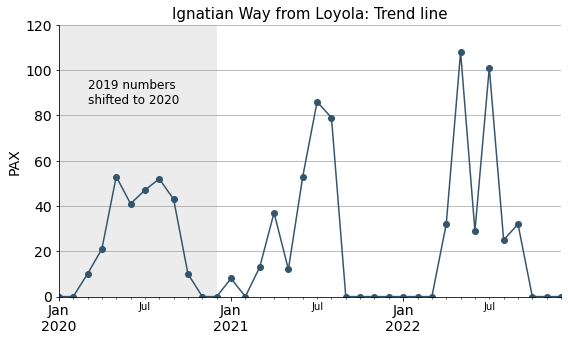

In [99]:
# 2019-----------------------------------
# Get pax numbers from 2019
ignatian_pax_19_as_20 = ignatian.loc["2019"]["pax"]

# Add an offset of 1 year to 2019 index
ignatian_pax_19_as_20.index = ignatian_pax_19_as_20.index + pd.DateOffset(years=1)

# Group by months and add pax numbers
ignatian_pax_19_as_20_monthly = ignatian_pax_19_as_20.groupby(ignatian_pax_19_as_20.index.month).sum()

# Create an index with the twelve months and assign it
twelve_months_20 = pd.date_range(start="2020-01-01", freq="M", periods=12)
ignatian_pax_19_as_20_monthly.index = twelve_months_20

# 2021-----------------------------------
# Get pax numbers from 2021
ignatian_pax_21 = ignatian.loc["2021"]["pax"]
ignatian_pax_21_monthly = ignatian_pax_21.groupby(ignatian_pax_21.index.month).sum()
twelve_months_21 = pd.date_range(start="2021-01-01", freq="M", periods=12)
ignatian_pax_21_monthly.index = twelve_months_21

# 2022-----------------------------------
ignatian_pax_22 = ignatian.loc["2022"]["pax"]
ignatian_pax_22_monthly = ignatian_pax_22.groupby(ignatian_pax_22.index.month).sum()
twelve_months_22 = pd.date_range(start="2022-01-01", freq="M", periods=12)
ignatian_pax_22_monthly.index = twelve_months_22


# Build the time series
ignatian_trend = pd.concat([ignatian_pax_19_as_20_monthly,
                            ignatian_pax_21_monthly,
                            ignatian_pax_22_monthly])

# Plot
fig, ax = plt.subplots(figsize=(9, 5))

ignatian_trend.plot(ax=ax, marker="o", color=palette_ign[3])

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Ignatian Way from Loyola: Trend line", size=15)
ax.set_xlabel("")
ax.set_ylabel("PAX", size=14)
ax.axvspan("2020-01-01", "2020-12-31", facecolor='grey', alpha=0.15)
ax.annotate("2019 numbers\nshifted to 2020", xy=(pd.Timestamp("2020-03-15"), 85),fontsize=12)
ax.set_ylim(0, 120)
sns.despine()

plt.show()

### Forecasting

In [100]:
# Import statsmodels and other packages
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

# Run the Augmented Dicky-Fuller test
result = adfuller(ignatian_trend)
result
print(f"Test statistics: {result[0]:.2f}")
print(f"p-value: {result[1]:.2f}")

Test statistics: -4.40
p-value: 0.00


It looks like the time series is stationary (has no statistically significant trend): that means the number of pilgrims during the last years has not changed substancially and there is no apparent trend either upwards nor downwards.

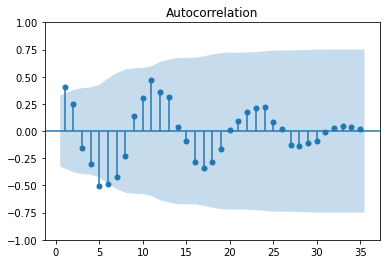

In [101]:
# Plot the ACF (AutoCorrelation Function)
plot_acf(ignatian_trend, lags=35, zero=False)

# Show figure
plt.show()

As expected, we have a 12 month seasonality in the data.

In [102]:
# # Calculate SARIMA model parameters
# model = pm.auto_arima(ignatian_trend,
#                       seasonal=True, m=12,
#                       trace=True,
#                       error_action='ignore',
#                       suppress_warnings=True)
# 
# # Print model summary
# print(model.summary())

In [103]:
%%capture
# Create a SARIMA model
model = SARIMAX(ignatian_trend,
                order=(0, 0, 0),
                seasonal_order=(1, 1, 0, 12))

# Fit the model
results = model.fit()

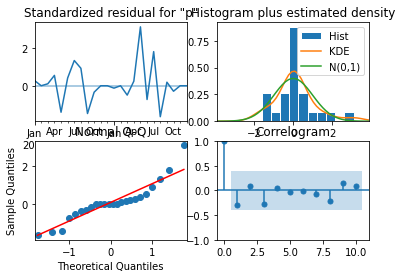

In [104]:
# Plot selected model diagnostics
results.plot_diagnostics()
plt.show()

The selected model diagnostics shows that the model had very few data during training, but the errors it made look like the model is acceptable.

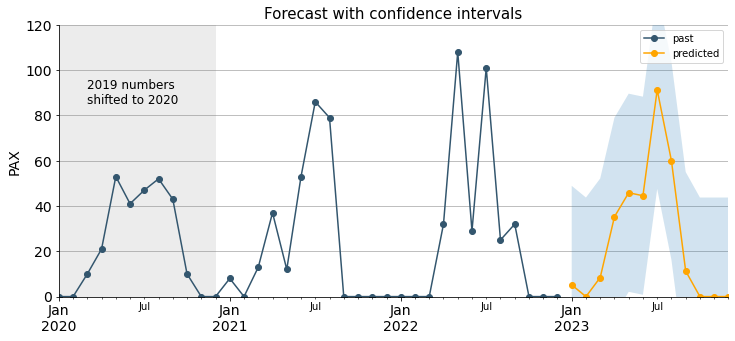

In [105]:
# Create forecast object
forecast_object = results.get_forecast(steps=12)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot past
ignatian_trend.plot(ax=ax, marker="o", label="past", color=palette_ign[3])

# Plot predicted
mean.plot(ax=ax, marker="o", label="predicted", color="orange")

# Shade between the confidence intervals
ax.fill_between(mean.index, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Forecast with confidence intervals", size=15)
ax.set_xlabel("")
ax.set_ylabel("PAX", size=14)
ax.axvspan("2020-01-01", "2020-12-31", facecolor='grey', alpha=0.15)
ax.annotate("2019 numbers\nshifted to 2020", xy=(pd.Timestamp("2020-03-15"), 85),fontsize=12)
ax.set_ylim(0, 120)
ax.legend()
sns.despine()

plt.show()

These are the predicted figures for each month in 2023:

In [106]:
# List predicted mean values for 2023
monthly_2023 = pd.DataFrame(mean.apply(lambda x: "{:,.0f}".format(x)))
print(monthly_2023)

           predicted_mean
2023-01-31              5
2023-02-28              0
2023-03-31              8
2023-04-30             35
2023-05-31             46
2023-06-30             45
2023-07-31             91
2023-08-31             60
2023-09-30             11
2023-10-31             -0
2023-11-30             -0
2023-12-31             -0


## Conclusions

In this little data analysis and prediction project some insights were shared about the actual figures in the Ignatian Way provided by the Tourist Information Office in Loyola. As mentioned, this data could probably be supplemented with more records coming from other sources as not all pilgrims seem to visit the Tourist Office while setting off. It could be interesting to have more data because the available one looks scarce to proceed with a full-fledged analysis.

Additionally, if some more features from pilgrims were provided (like age, gender, motives, etc.), it would be possible to proceed with a pilgrim-type segmentation analysis.